In [20]:
import pandas as pd
import torch
from matplotlib import rc,font_manager
font_path='C:/Windows/Fonts/gulim.ttc'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [21]:
df = pd.read_csv('거제도.csv', encoding='cp949')
df

,지점,일시,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,22104,2003-01-01,8.5,1023.8,52.0,2.9,15.9,2.0,0.7,1.0,3.3,7.6,9.5
1,22104,2003-01-02,5.6,1028.7,63.0,4.4,16.6,1.9,0.7,0.8,2.2,8.2,10.9
2,22104,2003-01-03,7.5,1018.6,64.0,5.2,16.9,1.8,0.6,0.8,3.1,9.2,11.8
3,22104,2003-01-04,10.3,1019.7,57.0,-0.6,16.7,2.1,0.7,0.9,2.8,12.5,75.0
4,22104,2003-01-05,8.8,1027.0,50.0,-2.6,15.8,2.0,0.7,0.8,2.6,9.7,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053,22104,2022-12-27,6.7,1026.1,44.0,7.4,15.7,1.9,1.2,1.5,2.4,5.4,6.8
7054,22104,2022-12-28,6.7,1027.9,54.0,6.3,15.3,1.5,1.0,1.2,1.9,4.5,5.1
7055,22104,2022-12-29,6.8,1031.0,58.0,4.8,15.0,1.3,0.9,1.2,1.9,4.1,5.3
7056,22104,2022-12-30,5.4,1030.7,55.0,5.7,15.1,1.0,0.7,0.9,1.5,3.9,4.4


In [22]:
df = df.rename(columns={'일시': 'date', '평균 기온(°C)': 'Atemp(°C)', '평균 수온(°C)': 'Stemp(°C)', '평균 최대 파고(m)':'wave(m)','평균 풍속(m/s)':'Wind(m/s)','평균기압(hPa)':'Apress(hPa)','평균 상대습도(%)':'Moisture(%)'})
df=df.set_index(pd.to_datetime(df.date)) # Date를 인덱스로
df=df[['Wind(m/s)','Apress(hPa)','Moisture(%)','Atemp(°C)','Stemp(°C)','wave(m)']] # Column 재정리
df

,Wind(m/s),Apress(hPa),Moisture(%),Atemp(°C),Stemp(°C),wave(m)
date,,,,,,
2003-01-01,8.5,1023.8,52.0,2.9,15.9,2.0
2003-01-02,5.6,1028.7,63.0,4.4,16.6,1.9
2003-01-03,7.5,1018.6,64.0,5.2,16.9,1.8
2003-01-04,10.3,1019.7,57.0,-0.6,16.7,2.1
2003-01-05,8.8,1027.0,50.0,-2.6,15.8,2.0
...,...,...,...,...,...,...
2022-12-27,6.7,1026.1,44.0,7.4,15.7,1.9
2022-12-28,6.7,1027.9,54.0,6.3,15.3,1.5
2022-12-29,6.8,1031.0,58.0,4.8,15.0,1.3


In [23]:
df.dropna(subset=['Wind(m/s)','Apress(hPa)','Moisture(%)','Atemp(°C)','Stemp(°C)','wave(m)'], inplace=True)
df

,Wind(m/s),Apress(hPa),Moisture(%),Atemp(°C),Stemp(°C),wave(m)
date,,,,,,
2003-01-01,8.5,1023.8,52.0,2.9,15.9,2.0
2003-01-02,5.6,1028.7,63.0,4.4,16.6,1.9
2003-01-03,7.5,1018.6,64.0,5.2,16.9,1.8
2003-01-04,10.3,1019.7,57.0,-0.6,16.7,2.1
2003-01-05,8.8,1027.0,50.0,-2.6,15.8,2.0
...,...,...,...,...,...,...
2022-12-27,6.7,1026.1,44.0,7.4,15.7,1.9
2022-12-28,6.7,1027.9,54.0,6.3,15.3,1.5
2022-12-29,6.8,1031.0,58.0,4.8,15.0,1.3


In [24]:
df = df.loc['2013-01-01':]
df

,Wind(m/s),Apress(hPa),Moisture(%),Atemp(°C),Stemp(°C),wave(m)
date,,,,,,
2013-01-01,7.4,1020.2,58.0,5.5,13.2,1.7
2013-01-02,8.3,1026.2,54.0,3.8,14.2,1.8
2013-01-03,11.0,1032.3,54.0,-2.0,13.8,1.8
2013-01-04,6.8,1028.7,49.0,0.1,14.4,1.6
2013-01-05,6.6,1023.6,43.0,2.4,14.9,1.3
...,...,...,...,...,...,...
2022-12-27,6.7,1026.1,44.0,7.4,15.7,1.9
2022-12-28,6.7,1027.9,54.0,6.3,15.3,1.5
2022-12-29,6.8,1031.0,58.0,4.8,15.0,1.3


In [25]:
correlation_matrix = df[['Wind(m/s)','Apress(hPa)','Moisture(%)','Atemp(°C)','Stemp(°C)','wave(m)']].corr()
correlation_matrix

,Wind(m/s),Apress(hPa),Moisture(%),Atemp(°C),Stemp(°C),wave(m)
Wind(m/s),1.000000,0.064332,-0.187501,-0.191314,-0.089153,0.759389
Apress(hPa),0.064332,1.000000,-0.719161,-0.695317,-0.521880,-0.064283
Moisture(%),-0.187501,-0.719161,1.000000,0.737726,0.486402,-0.036453
Atemp(°C),-0.191314,-0.695317,0.737726,1.000000,0.874523,-0.050692
Stemp(°C),-0.089153,-0.521880,0.486402,0.874523,1.000000,0.016290
wave(m),0.759389,-0.064283,-0.036453,-0.050692,0.016290,1.000000


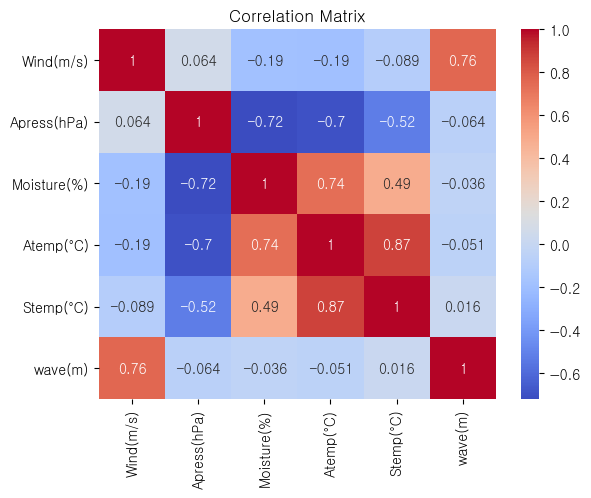

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['Wind(m/s)','Apress(hPa)','Moisture(%)','Atemp(°C)','Stemp(°C)','wave(m)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [27]:
monthly_avg_temp = df['Stemp(°C)'].resample('M').mean()
monthly_avg_temp

date
2013-01-31    13.390323
2013-02-28    12.339286
2013-03-31    13.116667
2013-04-30    13.603333
2013-05-31    15.467742
                ...    
2022-08-31    25.603226
2022-09-30    24.853333
2022-10-31    22.393548
2022-11-30    20.133333
2022-12-31    17.177419
Freq: M, Name: Stemp(°C), Length: 120, dtype: float64

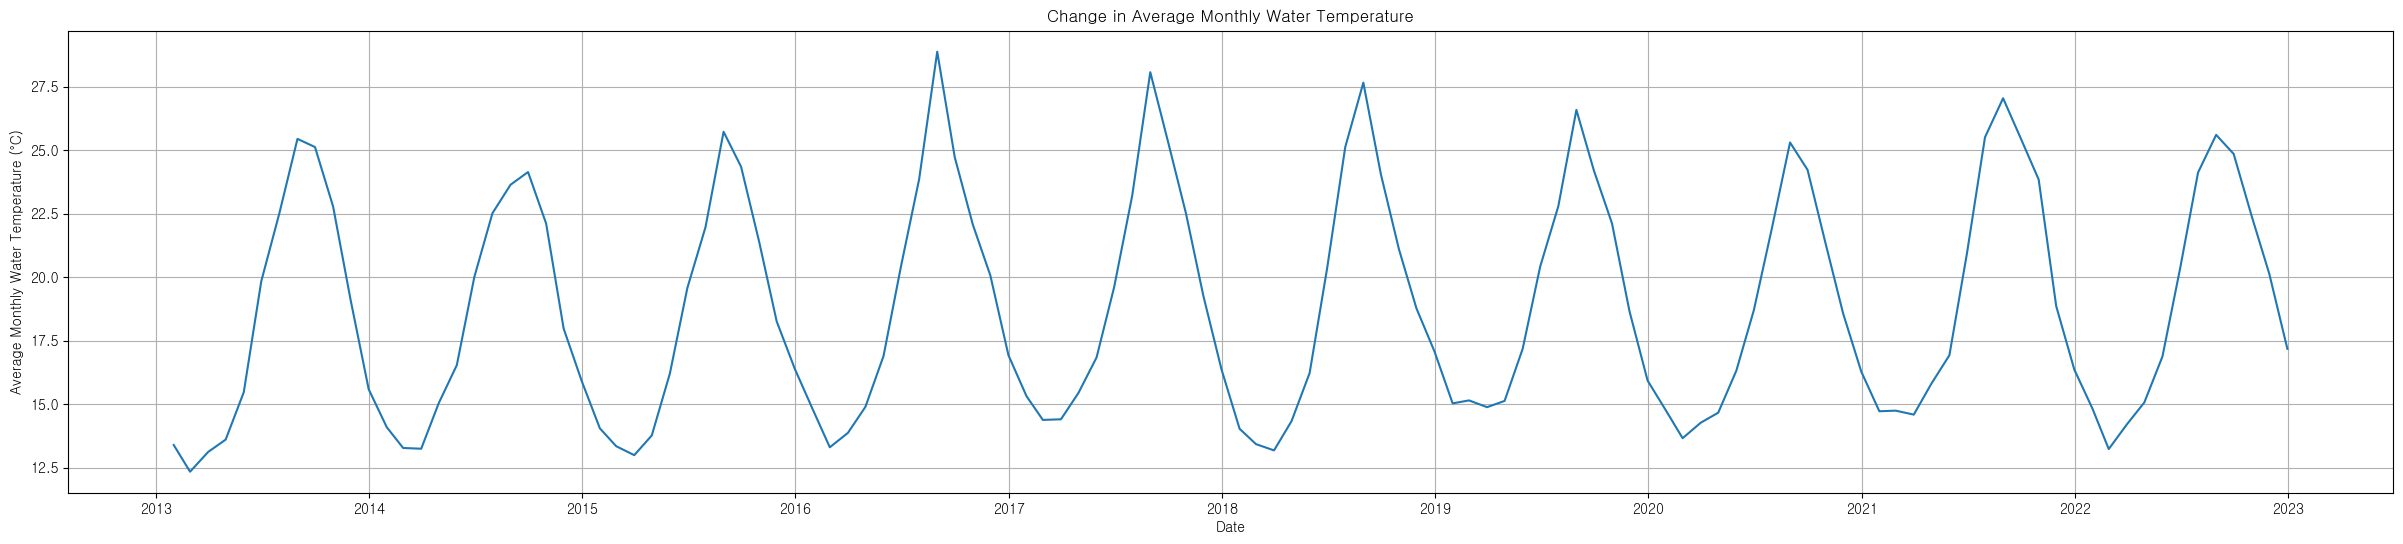

In [28]:
plt.figure(figsize=(30, 6))
plt.plot(monthly_avg_temp)
plt.xlabel('Date')
plt.ylabel('Average Monthly Water Temperature (°C)')
plt.title('Change in Average Monthly Water Temperature')
plt.grid(True)
plt.show()

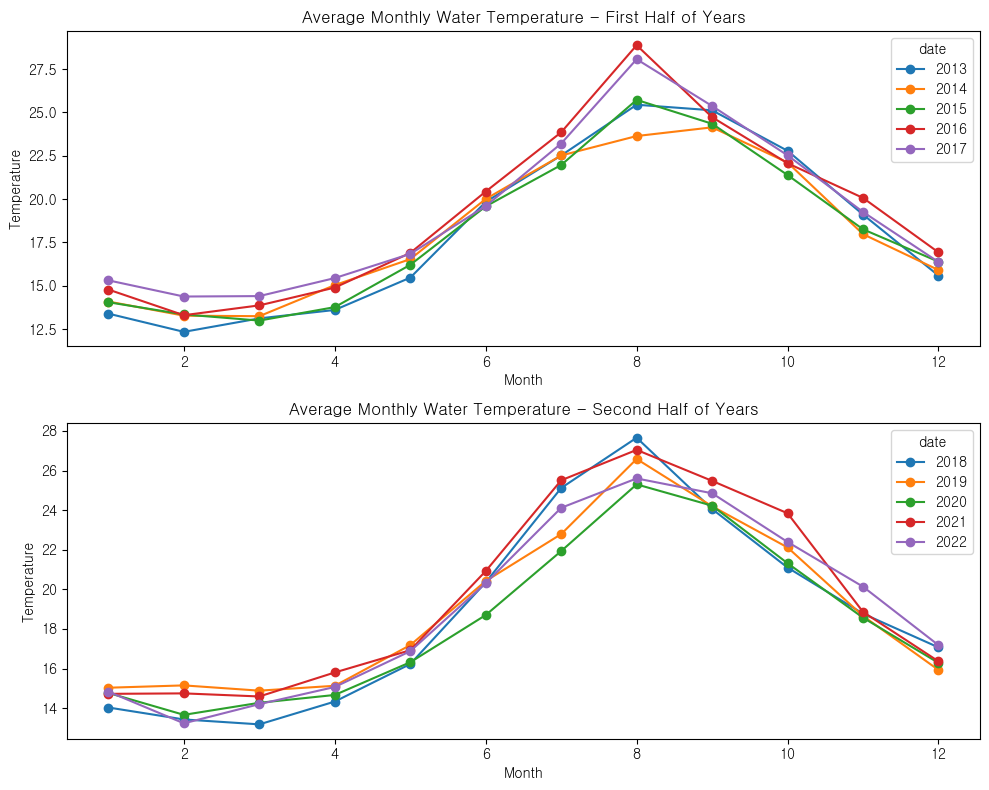

In [29]:
import matplotlib.pyplot as plt

# Group by year and month, and calculate the average temperature
yearly_monthly_avg = df.groupby([df.index.year, df.index.month])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and months as rows
yearly_monthly_avg = yearly_monthly_avg.unstack(level=0)

# Calculate the total number of years
num_years = yearly_monthly_avg.shape[1]

# Calculate the midpoint to divide the years into two groups
midpoint = num_years // 2

# Split the years into two groups
first_half_years = yearly_monthly_avg.iloc[:, :midpoint]
second_half_years = yearly_monthly_avg.iloc[:, midpoint:]

# Create two separate plots for the two groups of years
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot the first half of the years
first_half_years.plot(marker='o', linestyle='-', ax=axes[0])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Temperature')
axes[0].set_title('Average Monthly Water Temperature - First Half of Years')

# Plot the second half of the years
second_half_years.plot(marker='o', linestyle='-', ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Temperature')
axes[1].set_title('Average Monthly Water Temperature - Second Half of Years')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


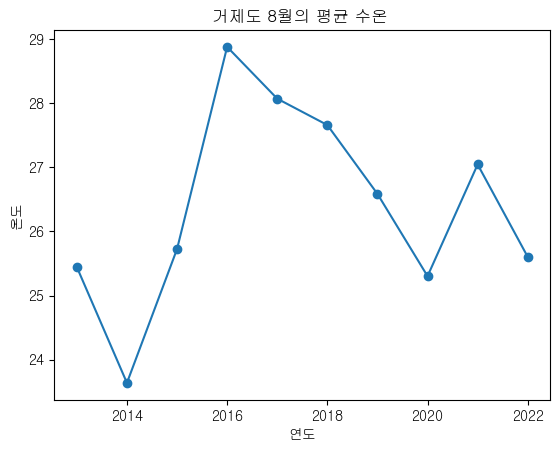

In [30]:
import matplotlib.pyplot as plt

# Define the specific month you want to plot
target_month = 8  # August

# Filter the data for the specific month
specific_month_data = df[df.index.month == target_month]

# Group by year and calculate the average temperature
yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()

# Extract the month from the target month
month_number = specific_month_data.index.month.unique()[0]

# Plot the average monthly water temperature for the specific month
yearly_avg_specific_month.plot(marker='o', linestyle='-')
plt.xlabel('연도')
plt.ylabel('온도')
plt.title(f'거제도 {month_number}월의 평균 수온 ')
plt.show()


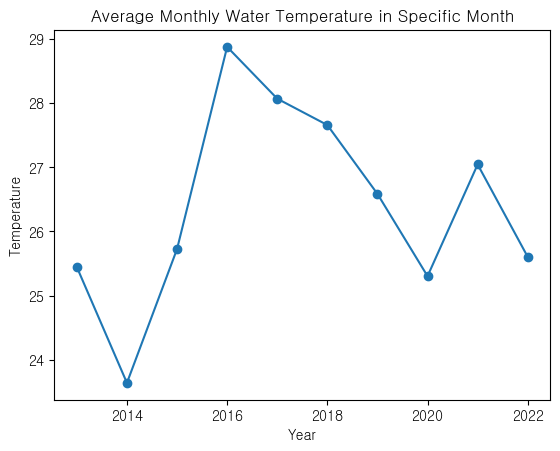

In [31]:
# Define the specific month you want to plot
target_month = 8 # August

# Filter the data for the specific month
specific_month_data = df[df.index.month == target_month]

# Group by year and calculate the average temperature
yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()

# Plot the average monthly water temperature for the specific month
yearly_avg_specific_month.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Monthly Water Temperature in Specific Month')
plt.show()

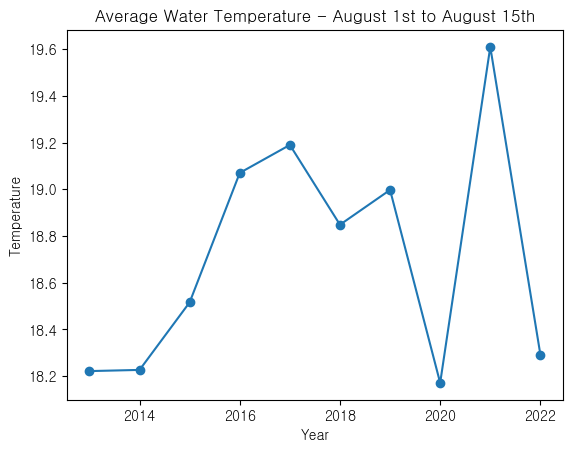

In [32]:

# Define the start and end dates for the range (August 1st to August 15th)
start_date = '2003-08-01'
end_date = '2022-08-15'

# Filter the data for the specified date range
date_range_data = df[(df.index >= start_date) & (df.index <= end_date)]

# Group by year and calculate the average temperature
yearly_avg_temp = date_range_data.groupby(date_range_data.index.year)['Stemp(°C)'].mean()

# Plot the average water temperature for the specified date range
yearly_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature - August 1st to August 15th')
plt.show()

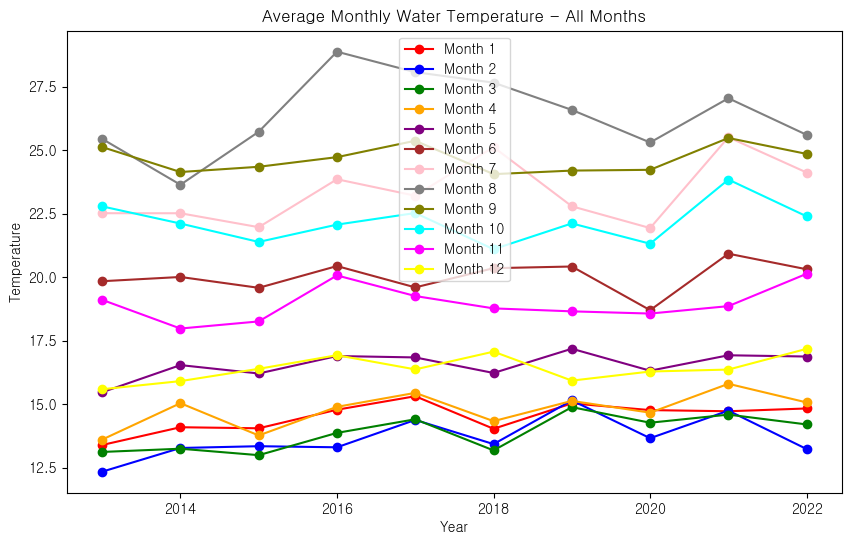

In [33]:

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each month and plot the average monthly water temperature
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Plot the average monthly water temperature for the specific month with a different color
    plt.plot(yearly_avg_specific_month.index, yearly_avg_specific_month.values, marker='o', linestyle='-', color=colors[i], label=f'Month {month}')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


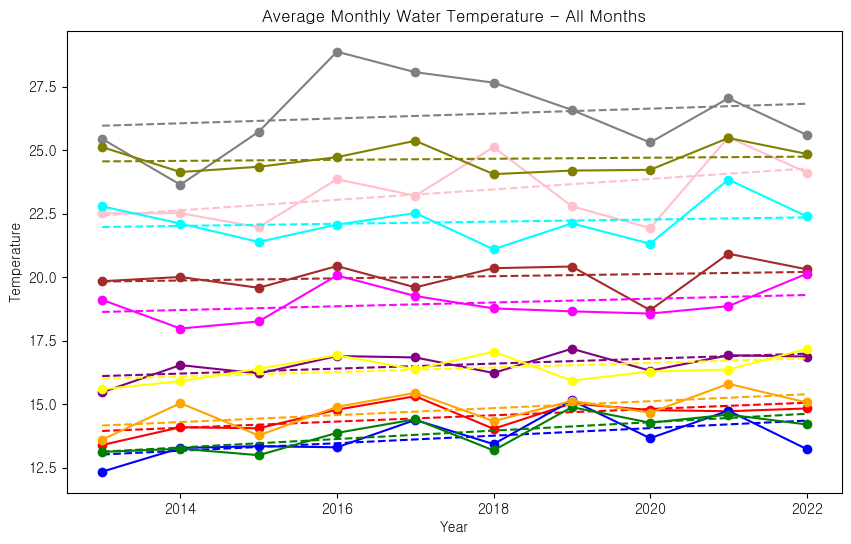

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each month and plot the average monthly water temperature
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Plot the average monthly water temperature for the specific month with a different color
    plt.plot(yearly_avg_specific_month.index, yearly_avg_specific_month.values, marker='o', linestyle='-', color=colors[i], label=f'Month {month}')

    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the linear regression line
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='--')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature - All Months')

# Display the plot
plt.show()


Order of trends by prominence:
1. Month 7 - Slope: 0.20552935601044608
2. Month 3 - Slope: 0.16577968936678594
3. Month 2 - Slope: 0.14830124196790864
4. Month 4 - Slope: 0.13685297418630743
5. Month 1 - Slope: 0.12363353969805574
6. Month 5 - Slope: 0.09797015208899747
7. Month 8 - Slope: 0.09616228710110793
8. Month 12 - Slope: 0.08891277723796925
9. Month 11 - Slope: 0.0741420610041297
10. Month 6 - Slope: 0.042107226107226024
11. Month 10 - Slope: 0.04208864694404203
12. Month 9 - Slope: 0.020894378568291544


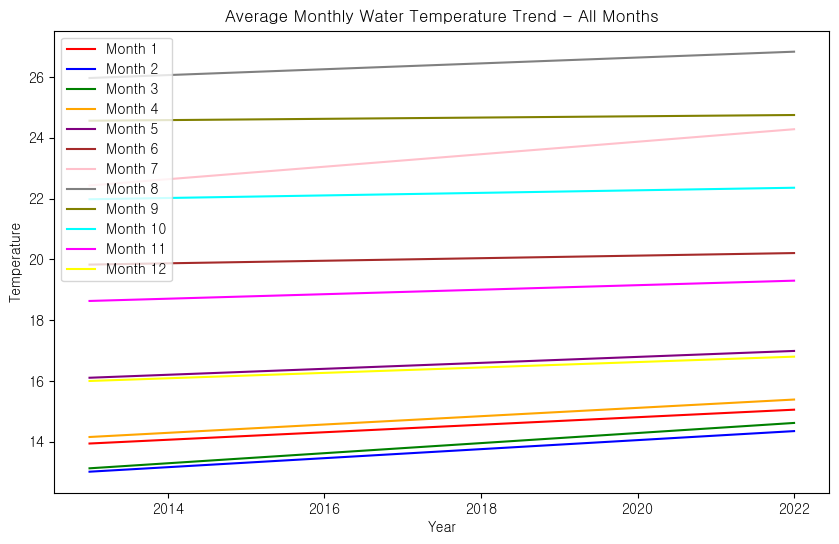

In [35]:

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Initialize a dictionary to store the slopes
slopes = {}

# Loop through each month and plot the average monthly water temperature trend
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the average monthly water temperature trend with a different color
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='-', label=f'Month {month}')
    
    # Calculate the slope of the trend line
    slope = reg.coef_[0][0]
    slopes[month] = slope

# Sort the slopes in descending order
sorted_slopes = sorted(slopes.items(), key=lambda x: x[1], reverse=True)

# Display the order of trends by prominence
print("Order of trends by prominence:")
for i, (month, slope) in enumerate(sorted_slopes):
    print(f"{i+1}. Month {month} - Slope: {slope}")

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature Trend - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_15128\2480682039.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df.index.month.map(month_to_season)


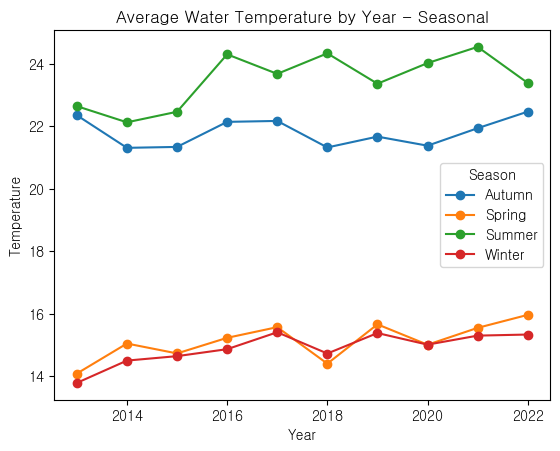

In [36]:
# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Plot the average water temperature for each year by season
yearly_seasonal_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature by Year - Seasonal')
plt.legend(title='Season')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\3022878532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df.index.month.map(month_to_season)


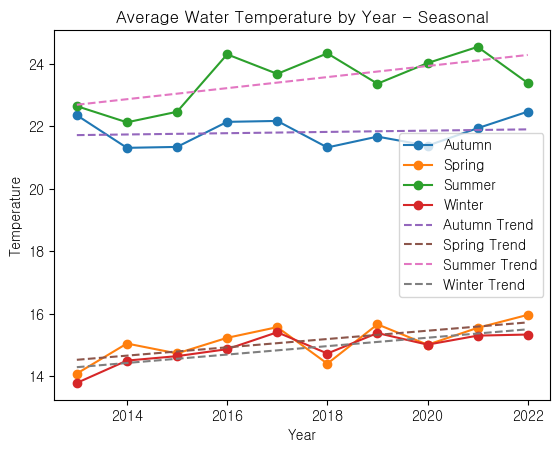

In [37]:

# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Plot the average water temperature for each year by season
yearly_seasonal_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature by Year - Seasonal')
plt.legend(title='Season')

# Add trend lines for each season
years = yearly_seasonal_avg_temp.index
seasons = yearly_seasonal_avg_temp.columns
for season in seasons:
    x = np.array(years).reshape(-1, 1)
    y = np.array(yearly_seasonal_avg_temp[season])
    model = LinearRegression()
    model.fit(x, y)
    trend_line = model.predict(x)
    plt.plot(years, trend_line, linestyle='--', label=f'{season} Trend')

plt.legend()
plt.show()


Order of trends by prominence:
1. Summer - Slope: 0.17699743008683594
2. Winter - Slope: 0.13470476119027042
3. Spring - Slope: 0.1329461559197252
4. Autumn - Slope: 0.020423370742578315


C:\Users\admin\AppData\Local\Temp\ipykernel_15128\930383813.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df.index.month.map(month_to_season)


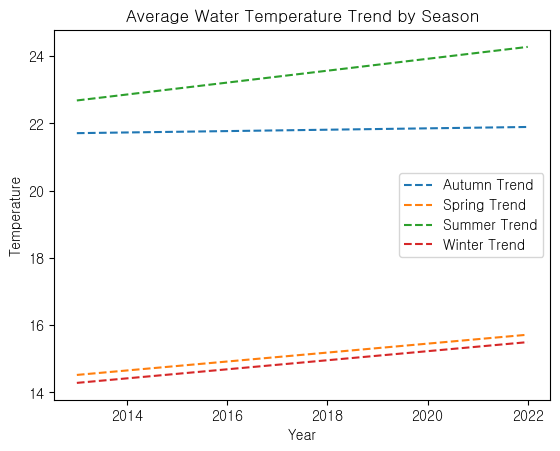

In [38]:
# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Initialize a dictionary to store the slopes
slopes = {}

# Plot the trend lines for each season and calculate the slopes
years = yearly_seasonal_avg_temp.index
seasons = yearly_seasonal_avg_temp.columns
for season in seasons:
    x = np.array(years).reshape(-1, 1)
    y = np.array(yearly_seasonal_avg_temp[season])
    model = LinearRegression()
    model.fit(x, y)
    trend_line = model.predict(x)
    plt.plot(years, trend_line, linestyle='--', label=f'{season} Trend')
    slopes[season] = model.coef_[0]

# Sort the slopes in descending order
sorted_slopes = sorted(slopes.items(), key=lambda x: x[1], reverse=True)

# Display the order of trends by prominence
print("Order of trends by prominence:")
for i, (season, slope) in enumerate(sorted_slopes):
    print(f"{i+1}. {season} - Slope: {slope}")

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature Trend by Season')
plt.legend()
plt.show()
